# Momento de Retroalimentación: Módulo 2 Implementación de un modelo de deep learning. (Portafolio Implementación)

## 1. Crea un repositorio de github para este proyecto.



[GIT HUB Repository](https://github.com/alexfne/IA_avanzada2)

## 2. Selecciona un problema y consigue un dataset para resolver dicho problema.


**Introducción**

La navegación eficiente y segura a través de las vías públicas requiere de una comprensión clara y precisa de las señales de tránsito por parte de los conductores. Estas señales, diseñadas para regular, advertir y guiar, son fundamentales para el mantenimiento del orden y la seguridad en las carreteras. Sin embargo, la diversidad y complejidad de las señales de tránsito pueden conducir a confusiones, interpretaciones erróneas y, en última instancia, a decisiones de conducción peligrosas. Esta problemática se ve exacerbada por factores como la variabilidad en el diseño de las señales entre diferentes regiones, el estado de conservación de las mismas, y las condiciones ambientales que pueden obstruir su visibilidad.

In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Check kaggle is working
!kaggle datasets list

ref                                                            title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                                DAIGT V2 Train Dataset                             29MB  2023-11-16 01:38:36            654         88  1.0              
carlmcbrideellis/llm-7-prompt-training-dataset                 LLM: 7 prompt training dataset                     41MB  2023-11-15 07:32:56           1145         96  1.0              
thedrcat/daigt-proper-train-dataset                            DAIGT Proper Train Dataset                        119MB  2023-11-05 14:03:25           1160        116  1.0              
muhammadbinimran/housing-price-prediction-data                 Housing Pric

In [4]:
!kaggle datasets download -d seebicb/traffic-signs-classification

 99% 271M/274M [00:14<00:00, 21.5MB/s]
100% 274M/274M [00:14<00:00, 19.3MB/s]


In [5]:
!unzip /content/traffic-signs-classification.zip -d traffic

Streaming output truncated to the last 5000 lines.
  inflating: traffic/traffic_Data/DATA/42/042_0005.png  
  inflating: traffic/traffic_Data/DATA/42/042_0006.png  
  inflating: traffic/traffic_Data/DATA/42/042_0006_j.png  
  inflating: traffic/traffic_Data/DATA/42/042_0007.png  
  inflating: traffic/traffic_Data/DATA/42/042_0008.png  
  inflating: traffic/traffic_Data/DATA/42/042_0008_j.png  
  inflating: traffic/traffic_Data/DATA/42/042_0009.png  
  inflating: traffic/traffic_Data/DATA/42/042_0011_j.png  
  inflating: traffic/traffic_Data/DATA/42/042_0016_j.png  
  inflating: traffic/traffic_Data/DATA/42/042_1_0001.png  
  inflating: traffic/traffic_Data/DATA/42/042_1_0002.png  
  inflating: traffic/traffic_Data/DATA/42/042_1_0002_1_j.png  
  inflating: traffic/traffic_Data/DATA/42/042_1_0003.png  
  inflating: traffic/traffic_Data/DATA/42/042_1_0003_1_j.png  
  inflating: traffic/traffic_Data/DATA/42/042_1_0004.png  
  inflating: traffic/traffic_Data/DATA/42/042_1_0004_1_j.png  
  i

In [6]:
import os
import shutil
import random

# Define la ruta base donde se encuentran las carpetas
base_path = '/content/traffic/traffic_Data/DATA'

# Define la ruta de la carpeta donde se guardarán las imágenes seleccionadas
destination_folder = '/content/traffic/traffic_Data/TEST'
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Número de carpetas a iterar
num_folders = 58

# Itera sobre cada una de las carpetas numeradas
for i in range(1, num_folders + 1):
    folder_name = str(i-1)  # Suponiendo que las carpetas están numeradas del 1 al 58
    folder_path = os.path.join(base_path, folder_name)

    # Lista de todas las imágenes en la carpeta actual
    images = [img for img in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, img))]

    # Selecciona un número aleatorio entre 3 y 10 de imágenes
    num_images_to_select = random.randint(3, 10)
    selected_images = random.sample(images, min(len(images), num_images_to_select))

    # Copia cada imagen seleccionada a la carpeta de destino
    for image in selected_images:
        source_path = os.path.join(folder_path, image)
        destination_path = os.path.join(destination_folder, f"{folder_name}_{image}")
        shutil.copy2(source_path, destination_path)

print(f"Las imágenes seleccionadas se han copiado a {destination_folder}")


Las imágenes seleccionadas se han copiado a /content/traffic/traffic_Data/TEST


## 3. Implementa una arquitectura de deep learning para solucionar el problema. Lo que se busca es que apliques correcta y efectivamente las técnicas vistas en el módulo.


### Libraries

In [7]:
# Librerías estándar de Python para manipulación de archivos y operaciones aleatorias
import os  # Proporciona funciones para interactuar con el sistema operativo, como manejo de archivos y directorios.
import random  # Ofrece funciones para generar números aleatorios, seleccionar elementos aleatorios de una lista, etc.

# Librerías para el procesamiento de datos
import numpy as np  # Biblioteca de cálculo científico para operaciones matemáticas con arrays y matrices.
import pandas as pd  # Biblioteca para manipulación y análisis de datos estructurados con DataFrames.

# Librerías de TensorFlow para construir y entrenar redes neuronales
import tensorflow as tf  # Framework de aprendizaje automático para entrenamiento de modelos de redes neuronales.
from tensorflow.keras import layers  # Módulo para construir capas de redes neuronales, como convolucionales, pooling, etc.
from tensorflow.keras.models import Sequential  # Permite crear modelos de redes neuronales secuenciales.
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D  # Tipos específicos de capas para modelos.
from tensorflow.keras.optimizers import Adam  # Algoritmo de optimización para entrenar redes neuronales.
from tensorflow.keras.callbacks import EarlyStopping  # Callback para detener el entrenamiento cuando una métrica deja de mejorar.

# Librerías para el procesamiento y análisis de imágenes
from PIL import Image as PILImage  # Biblioteca para abrir, manipular y guardar muchos formatos de archivos de imágenes.
import cv2  # OpenCV proporciona herramientas de visión por computadora y procesamiento de imágenes.
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG  # Herramienta para la generación y aumento de datos de imagen.

# Librerías para la visualización de datos
import matplotlib.pyplot as plt  # Biblioteca para crear visualizaciones estáticas, animadas e interactivas en Python.
import matplotlib.patches as patches  # Utilizado para agregar formas, como rectángulos, a las visualizaciones.
import seaborn as sns
import plotly.express as px  # Herramienta para crear gráficos interactivos y visualizaciones de datos de alta calidad.
from IPython.display import Image, display  # Módulos para mostrar imágenes y otros objetos en entornos como Jupyter.
from IPython.display import clear_output as cls  # Función para limpiar la salida actual del área de visualización de Jupyter.

# Librerías de Scikit-learn para la división de datos y evaluación del modelo
from sklearn.model_selection import train_test_split  # Función para dividir fácilmente los datos en conjuntos de entrenamiento y prueba.
from sklearn.metrics import accuracy_score, confusion_matrix  # Función para calcular la precisión de las predicciones de un modelo.

# Librería para trabajar con rutas de archivos
import pathlib  # Ofrece clases para manejar de forma sencilla y objetiva las rutas de los sistemas de archivos.

# Librería para expresiones regulares
import re  # Permite realizar operaciones con expresiones regulares como buscar, editar y manipular texto.


### Roots

In [8]:
# Root path.
DATA = '/content/traffic/traffic_Data/DATA'
TEST = '/content/traffic/traffic_Data/TEST'
LABELS = '/content/traffic/traffic_Data/labels.csv'

### Class names

In [9]:
# Recoger los nombres de las clases.
class_names = sorted(os.listdir(DATA))  # Listar y ordenar los nombres de los directorios que se encuentran en train_path.
n_classes = len(class_names)  # Contar el número total de clases obtenidas.

# Imprimir la información recogida.
print("No. de Clases : {}".format(n_classes))  # Imprimir el número de clases distintas encontradas.
print("Clases        : {}".format(class_names))  # Imprimir los nombres de las clases.

No. de Clases : 58
Clases        : ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '6', '7', '8', '9']


In [10]:
# Cargar etiquetas desde el archivo CSV
labels = pd.read_csv(LABELS)
print(labels)

    ClassId                          Name
0         0           Speed limit (5km/h)
1         1          Speed limit (15km/h)
2         2          Speed limit (30km/h)
3         3          Speed limit (40km/h)
4         4          Speed limit (50km/h)
5         5          Speed limit (60km/h)
6         6          Speed limit (70km/h)
7         7          speed limit (80km/h)
8         8      Dont Go straight or left
9         9     Dont Go straight or Right
10       10              Dont Go straight
11       11                  Dont Go Left
12       12         Dont Go Left or Right
13       13                 Dont Go Right
14       14       Dont overtake from Left
15       15                      No Uturn
16       16                        No Car
17       17                       No horn
18       18          Speed limit (40km/h)
19       19          Speed limit (50km/h)
20       20          Go straight or right
21       21                   Go straight
22       22                       

### Distribution

In [11]:
# Calcular la distribución de las clases contando los archivos en cada subdirectorio de clases
class_dis = [len(os.listdir(DATA + "/"+ name)) for name in class_names]

# Visualizar la distribución de las clases utilizando un gráfico de pastel (pie chart)
fig = px.pie(names=class_names, values=class_dis, hole=0.3)  # Crea un gráfico de dona
fig.update_layout({"title":{'text':"Training Class Distribution", 'x':0.48}})  # Establecer el título del gráfico
fig.show()  # Mostrar el gráfico de pastel

# Visualizar la distribución de las clases utilizando un gráfico de barras
fig = px.bar(x=class_names, y=class_dis, color=class_names)  # Asignar colores únicos por clase
fig.show()  # Mostrar el gráfico de barras


### Cargar imágenes

In [12]:
# Configurar parámetros para el procesamiento y aumento de imágenes de entrenamiento
train_gen = IDG(
    rescale=1./255,  # Normalizar las imágenes dividiendo cada pixel por 255 para que estén en el rango [0, 1]
    rotation_range=10,  # Permitir rotaciones aleatorias de la imagen hasta 10 grados
    width_shift_range=0.1,  # Permitir desplazamientos horizontales hasta el 10% del ancho de la imagen
    height_shift_range=0.1,  # Permitir desplazamientos verticales hasta el 10% de la altura de la imagen
    shear_range=0.1,  # Aplicar cortes aleatorios hasta un 10%
    zoom_range=0.1,  # Permitir un zoom aleatorio hasta un 10%
    horizontal_flip=True,  # Permitir voltear las imágenes horizontalmente
    fill_mode='nearest'  # Rellenar los píxeles faltantes (después de rotación o desplazamiento) con el valor del pixel más cercano
)

# Configurar parámetros para el procesamiento de imágenes de validación, usualmente sin aumento para evaluar el rendimiento
valid_gen = IDG(rescale=1./255)  # Solo normalizar las imágenes sin aplicar aumento

# Crear un generador de datos para el conjunto de entrenamiento
train_ds = train_gen.flow_from_directory(
    DATA,  # Directorio donde se encuentran las imágenes de entrenamiento
    shuffle=True,  # Mezclar las imágenes para que el orden de las mismas sea aleatorio
    batch_size=32,  # Tamaño del lote para el entrenamiento
    target_size=(32, 32),  # Redimensionar las imágenes al tamaño especificado
    class_mode='categorical'  # Establecer el modo de las etiquetas a categórico para clasificación multiclase
)

# Crear un generador de datos para el conjunto de validación
valid_ds = valid_gen.flow_from_directory(
    TEST,  # Directorio donde se encuentran las imágenes de validación
    shuffle=False,  # No es necesario mezclar durante la validación
    batch_size=32,  # Tamaño del lote para la validación
    target_size=(32, 32),  # Redimensionar las imágenes al tamaño especificado
    class_mode='categorical'  # Establecer el modo de las etiquetas a categórico para clasificación multiclase
)


Found 4156 images belonging to 58 classes.
Found 0 images belonging to 0 classes.


In [13]:
# Inicializar listas vacías para almacenar imágenes y sus correspondientes etiquetas
data = []
target = []

# Leer las imágenes y sus etiquetas iterando a través de cada clase
for label, label_name in labels.values:
    # Construir el directorio de la clase actual
    label_dir = os.path.join(DATA, str(label))
    # Iterar a través de cada archivo de imagen en el directorio de la clase
    for img_file in os.listdir(label_dir):
        # Obtener la ruta completa de la imagen
        img_path = os.path.join(label_dir, img_file)
        # Leer la imagen usando OpenCV
        image = cv2.imread(img_path)
        # Convertir la imagen de BGR a RGB ya que OpenCV carga las imágenes en BGR por defecto
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Redimensionar la imagen al tamaño deseado (64x64 píxeles en este caso)
        image = cv2.resize(image, (64, 64))
        # Añadir la imagen procesada a la lista de datos
        data.append(image)
        # Añadir la etiqueta correspondiente a la lista de etiquetas
        target.append(label)

# Convertir las listas de imágenes y etiquetas a matrices NumPy para su uso con bibliotecas de aprendizaje automático
data = np.array(data)
target = np.array(target)

# Normalizar las imágenes dividiendo cada pixel por 255 para que sus valores estén en el rango [0, 1]
data = data / 255.0


### Modelo

In [14]:
# Definir el modelo secuencial de Keras
model = Sequential([
    # Primera capa convolucional con 32 filtros, un kernel de tamaño 3x3 y función de activación ReLU
    # 'input_shape' define la forma de las entradas que el modelo espera
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),

    # Primera capa de MaxPooling para reducir la dimensión espacial (ancho y alto de la imagen)
    layers.MaxPooling2D((2, 2)),

    # Segunda capa convolucional con 64 filtros y función de activación ReLU
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Segunda capa de MaxPooling para seguir reduciendo la dimensión espacial
    layers.MaxPooling2D((2, 2)),

    # Tercera capa convolucional con 64 filtros y función de activación ReLU
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Aplanar los datos multidimensionales para que puedan ser procesados por capas densas
    layers.Flatten(),

    # Capa densa (fully-connected) con 128 unidades y función de activación ReLU
    layers.Dense(128, activation='relu'),

    # Capa de salida densa con 58 unidades (una por cada clase) y función de activación softmax
    # Softmax se utiliza para obtener probabilidades de las clases en problemas de clasificación multiclase
    layers.Dense(58, activation='softmax')  # Asumiendo que hay 58 clases de señales de tráfico
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


### Entrenamiento

Epoch 1/10
104/104 [==============================] - 12s 12ms/step - loss: 2.4338 - accuracy: 0.4022 - val_loss: 1.2865 - val_accuracy: 0.6623
Epoch 2/10
104/104 [==============================] - 1s 8ms/step - loss: 0.7983 - accuracy: 0.7909 - val_loss: 0.5206 - val_accuracy: 0.8522
Epoch 3/10
104/104 [==============================] - 1s 7ms/step - loss: 0.3123 - accuracy: 0.9227 - val_loss: 0.2540 - val_accuracy: 0.9291
Epoch 4/10
104/104 [==============================] - 1s 8ms/step - loss: 0.1226 - accuracy: 0.9681 - val_loss: 0.1784 - val_accuracy: 0.9591
Epoch 5/10
104/104 [==============================] - 1s 8ms/step - loss: 0.0942 - accuracy: 0.9741 - val_loss: 0.1389 - val_accuracy: 0.9555
Epoch 6/10
104/104 [==============================] - 1s 9ms/step - loss: 0.0455 - accuracy: 0.9868 - val_loss: 0.0591 - val_accuracy: 0.9832
Epoch 7/10
104/104 [==============================] - 1s 8ms/step - loss: 0.0099 - accuracy: 0.9976 - val_loss: 0.0594 - val_accuracy: 0.9856
Epoc

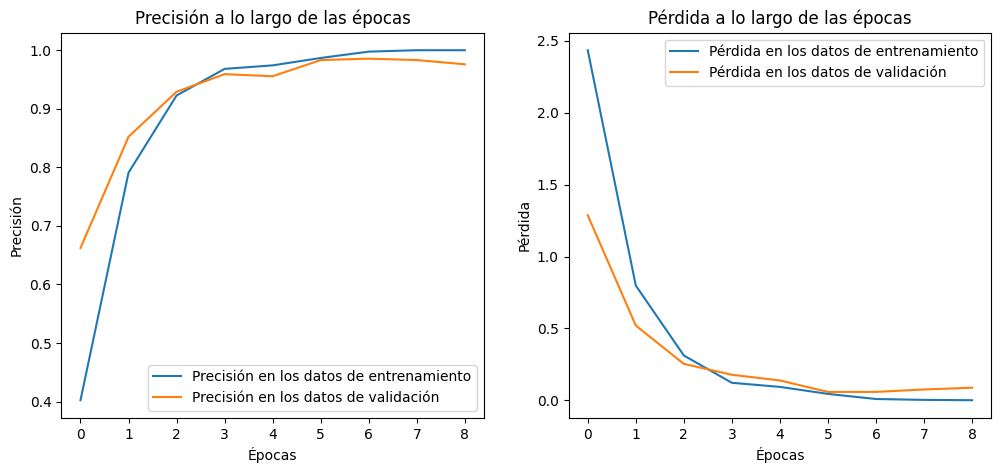

Precisión en los datos de entrenamiento: 0.9987966418266296, Precisión en los datos de validación: 0.9831730723381042
El modelo tiene un buen ajuste a los datos.


In [15]:
# Separar los datos en conjuntos de entrenamiento (80%) y validación (20%)
data_train, data_val, target_train, target_val = train_test_split(data, target, test_size=0.2, random_state=42)

# Configurar EarlyStopping para detener el entrenamiento cuando no hay mejora en la pérdida de validación
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Comenzar el entrenamiento del modelo con los datos de entrenamiento y usando los de validación para la evaluación
history = model.fit(
    data_train, target_train,
    epochs=10,  # Número de épocas para entrenar el modelo
    validation_data=(data_val, target_val),  # Datos para evaluar la mejora del modelo después de cada época
    callbacks=[early_stopping]  # Callbacks como EarlyStopping para mejorar el entrenamiento
)

# Visualizar la precisión del modelo a lo largo de las épocas de entrenamiento
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en los datos de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en los datos de validación')
plt.title('Precisión a lo largo de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Visualizar la pérdida del modelo a lo largo de las épocas de entrenamiento
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida en los datos de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en los datos de validación')
plt.title('Pérdida a lo largo de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()  # Mostrar las gráficas de precisión y pérdida

# Evaluar el rendimiento del modelo en los conjuntos de entrenamiento y validación
train_loss, train_accuracy = model.evaluate(data_train, target_train, verbose=0)
val_loss, val_accuracy = model.evaluate(data_val, target_val, verbose=0)

# Imprimir la precisión del entrenamiento y validación
print(f"Precisión en los datos de entrenamiento: {train_accuracy}, Precisión en los datos de validación: {val_accuracy}")

# Interpretar los resultados basados en la precisión de entrenamiento y validación
if train_accuracy > val_accuracy and val_accuracy < 0.6:
    print("El modelo probablemente está sobreajustando los datos de entrenamiento.")  # Overfitting
elif train_accuracy < val_accuracy or (train_accuracy - val_accuracy) < 0.1:
    print("El modelo tiene un buen ajuste a los datos.")  # Buen ajuste
elif val_accuracy > 0.6 and (train_accuracy - val_accuracy) > 0.1:
    print("El modelo podría estar subajustando los datos de entrenamiento.")  # Underfitting


26/26 [==============================] - 0s 3ms/step


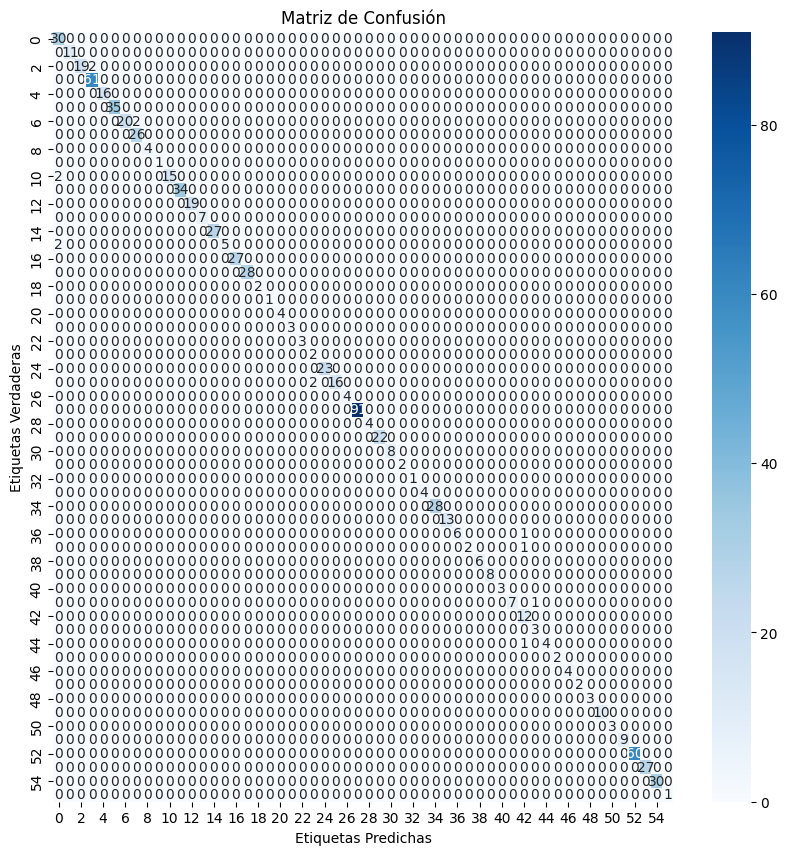

In [16]:
# Realizar predicciones sobre el conjunto de validación
predictions = model.predict(data_val)
# Convertir las predicciones a etiquetas
predicted_labels = np.argmax(predictions, axis=1)

# Generar la matriz de confusión
cm = confusion_matrix(target_val, predicted_labels)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()

### Testeo

In [17]:
# Cargar y preprocesar las imágenes de prueba (ajusta según tu modelo)
X_test = []  # Lista para almacenar los datos de las imágenes de prueba
y_test_true = []  # Lista para almacenar las etiquetas reales correspondientes a las imágenes de prueba

# Iterar sobre cada archivo en el directorio de prueba
for image_file in os.listdir(TEST):
    image_path = os.path.join(TEST, image_file)  # Construir la ruta completa del archivo
    image = PILImage.open(image_path)  # Abrir la imagen usando PIL
    image = image.resize((64, 64))  # Redimensionar la imagen a 64x64 píxeles (o el tamaño esperado por tu modelo)
    image = np.array(image) / 255.0  # Convertir la imagen a un array de NumPy y normalizar los valores de los píxeles a [0, 1]
    X_test.append(image)  # Añadir la imagen procesada a la lista X_test

    # Extraer la etiqueta del nombre del archivo (suponiendo que el nombre del archivo contiene la etiqueta al principio)
    label = int(image_file.split("_")[0])  # Convertir la etiqueta a entero
    y_test_true.append(label)  # Añadir la etiqueta a la lista y_test_true

# Convertir las listas de imágenes y etiquetas a matrices NumPy para su uso con el modelo
X_test = np.array(X_test)
y_test_true = np.array(y_test_true)

# Realizar predicciones en el conjunto de prueba utilizando el modelo entrenado
y_test_pred = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred, axis=1)  # Convertir las predicciones de probabilidades a etiquetas de clase

# Calcular la precisión comparando las etiquetas verdaderas y las predichas
accuracy = accuracy_score(y_test_true, y_test_pred)

# Imprimir la precisión del modelo en el conjunto de prueba
print("Precisión en el conjunto de prueba:", accuracy)


13/13 [==============================] - 0s 10ms/step
Precisión en el conjunto de prueba: 0.9899497487437185


1/1 [==============================] - 0s 18ms/step


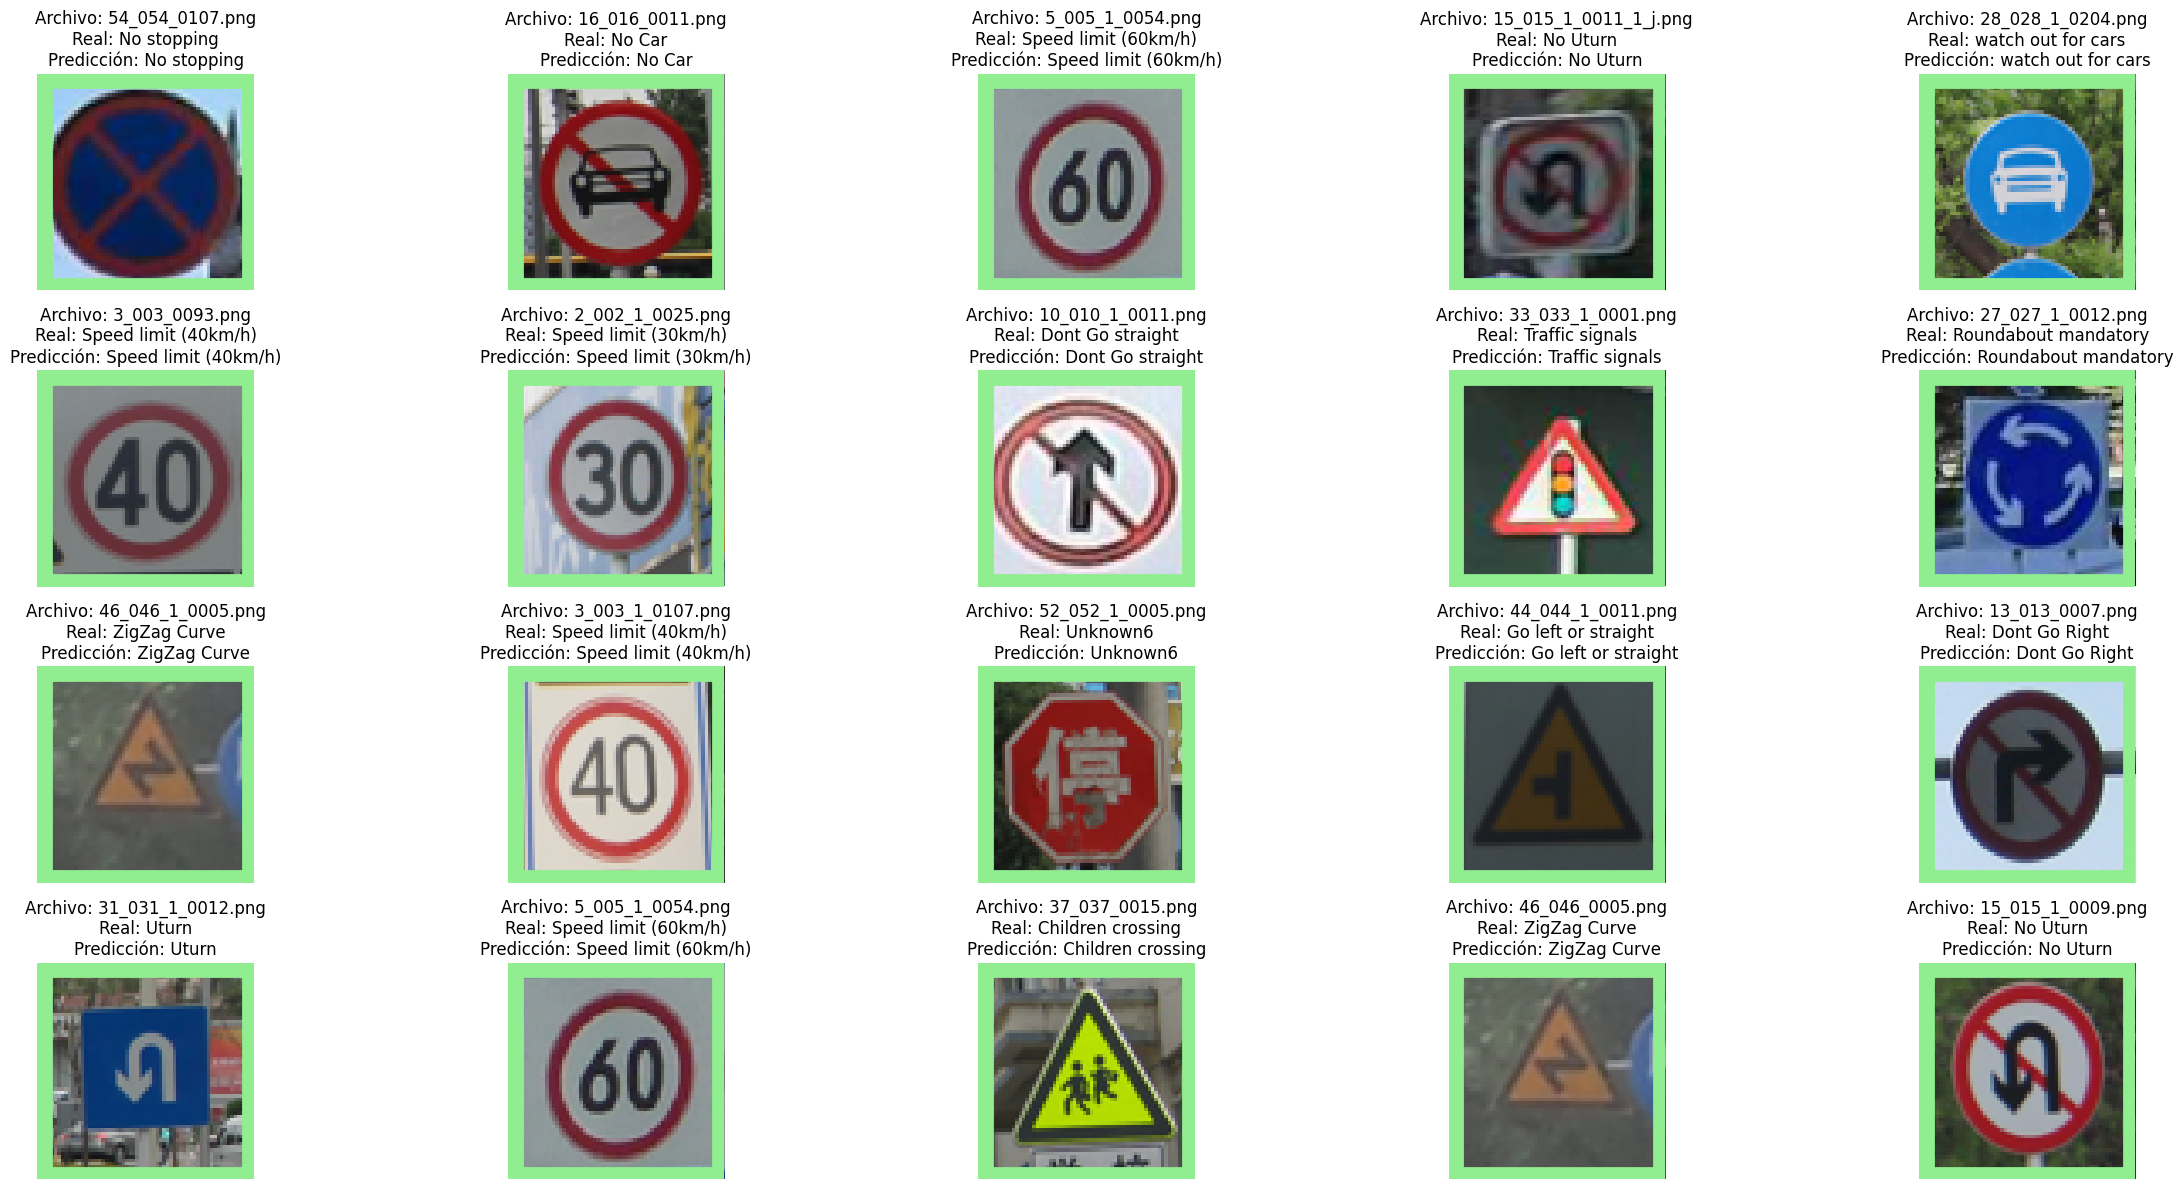

In [18]:
# Lista todos los archivos en el directorio de pruebas
image_files = os.listdir(TEST)

# Define la cantidad de imágenes a mostrar y cómo se distribuirán en la gráfica
num_tests = 20  # Total de pruebas/imágenes a mostrar
num_columns = 5  # Número de columnas en la gráfica de subplots
# Calcula el número de filas necesarias para mostrar todas las imágenes
num_rows = num_tests // num_columns + (num_tests % num_columns > 0)

# Crea una figura grande para acomodar todos los subplots
plt.figure(figsize=(5 * num_columns, 3 * num_rows))

# Bucle para procesar y mostrar cada imagen
for i in range(num_tests):  # Itera 20 veces
    random_image_file = random.choice(image_files)  # Selecciona un archivo de imagen al azar

    random_image_path = os.path.join(TEST, random_image_file)  # Obtiene la ruta completa del archivo

    # Carga y procesa la imagen
    image = PILImage.open(random_image_path)
    image = image.resize((64, 64))  # Cambia el tamaño de la imagen a 64x64 píxeles
    image = np.array(image)  # Convierte la imagen a un array de NumPy
    image = image / 255.0  # Normaliza los valores de los píxeles

    predictions = model.predict(np.expand_dims(image, axis=0))  # Realiza una predicción con el modelo

    predicted_class = np.argmax(predictions)  # Obtiene el índice de la clase con la probabilidad más alta

    # Intenta extraer la etiqueta real de la imagen del nombre del archivo
    match = re.search(r'(\d+)_', random_image_file)
    if match:
        class_id = int(match.group(1))  # Si encuentra un número al inicio del nombre, lo usa como etiqueta
        # Busca el nombre de la clase real y predicha en un DataFrame
        nombre_de_clase = labels.loc[labels['ClassId'] == class_id, 'Name'].values[0]
        nombre_de_prediccion = labels.loc[labels['ClassId'] == int(predicted_class), 'Name'].values[0]
    else:
        # Si no encuentra una etiqueta adecuada, asume valores desconocidos
        class_id = '?'
        nombre_de_clase = 'Desconocido'
        nombre_de_prediccion = 'Desconocido'

    # Configura el subplot para la imagen actual
    ax = plt.subplot(num_rows, num_columns, i+1)
    plt.imshow(image)  # Muestra la imagen
    # Establece un título con el nombre del archivo, la clase real y la predicción
    plt.title(f'Archivo: {random_image_file}\nReal: {nombre_de_clase}\nPredicción: {nombre_de_prediccion}')
    plt.axis('off')  # Oculta los ejes

    # Añade un rectángulo alrededor de la imagen
    # El color del rectángulo indica si la predicción fue correcta (verde) o incorrecta (rojo)
    rect_color = '#90ee90' if nombre_de_clase == nombre_de_prediccion else 'red'
    rect_line_width = 20  # Define el grosor del rectángulo
    rect = patches.Rectangle((0, 0), 64, 64, linewidth=rect_line_width, edgecolor=rect_color, facecolor='none')
    ax.add_patch(rect)  # Agrega el rectángulo al subplot

plt.tight_layout()  # Ajusta el layout para que no haya superposición de elementos
plt.show()  # Muestra la figura completa con todos los subplots


## 4. Mejora tu modelo usando técnicas de regularización, ajustando hiper parámetros, modificando la arquitectura de tu modelo o buscando otro modelo.


### Ajustar brillo

In [19]:
def adjust_brightness(image):
    # Divide los valores de los píxeles de la imagen por 255 para normalizar al rango [0, 1]
    image = image / 255.0

    # Aumenta la intensidad de todos los píxeles de la imagen en un factor de 1.2 para hacer la imagen más brillante
    # np.clip asegura que los valores de los píxeles se mantengan dentro del rango [0, 1] después del ajuste
    image = np.clip(image * 1.2, 0, 1)

    # Devuelve la imagen con el brillo ajustado
    return image

### Ajuste de contraste

In [20]:
def adjust_contrast(image):
    # Convierte los valores de píxeles de la imagen a flotantes de 32 bits para facilitar la manipulación,
    # especialmente útil para evitar el desbordamiento o subdesbordamiento durante el procesamiento.
    image = image.astype('float32')

    # Normaliza los valores de los píxeles de la imagen al rango [0, 1] dividiéndolos por 255
    # ya que los valores originales de los píxeles están en el rango [0, 255].
    image /= 255.0

    # Define un factor para ajustar el contraste. Un valor mayor a 1 aumentará el contraste,
    # mientras que un valor menor a 1 lo disminuirá.
    factor = 1.5

    # Calcula la media de los valores de los píxeles de la imagen, que se utilizará para ajustar el contraste.
    mean = np.mean(image, axis=(0, 1), keepdims=True)

    # Ajusta el contraste de la imagen. Resta la media a cada píxel, multiplica por el factor de contraste
    # y luego suma la media nuevamente. La función np.clip garantiza que los valores resultantes
    # se mantengan dentro del rango [0, 1].
    image = np.clip((image - mean) * factor + mean, 0, 1)

    # Convierte los valores de píxeles de nuevo al rango [0, 255] y cambia el tipo de datos a uint8,
    # que es el tipo de datos estándar para las imágenes con valores de píxeles enteros.
    image = np.uint8(image * 255)

    # Devuelve la imagen con el contraste ajustado.
    return image

### Filtro de desenfoque

In [21]:
def apply_blur(image):
    # Utiliza la función GaussianBlur de OpenCV para aplicar un desenfoque gaussiano a la imagen.
    # El tamaño del kernel para el desenfoque es de 5x5 y la desviación estándar en la dirección X e Y se establece en 0.
    # Esto suavizará la imagen para reducir el ruido y los detalles.
    image = cv2.GaussianBlur(image, (5, 5), 0)

    # Devuelve la imagen después de aplicar el desenfoque gaussiano.
    return image

### Inversion de colores (negativo)

In [22]:
def color_inversion(image):
    # Realiza la inversión de color para cada píxel de la imagen.
    # La inversión se hace restando el valor actual del píxel de 255 (el valor máximo para un píxel en una imagen de 8 bits).
    # Esto cambia los colores oscuros por claros y viceversa, creando un efecto de negativo fotográfico.
    image = 255 - image

    # Devuelve la imagen con los colores invertidos.
    return image

### Cargar imágenes

In [23]:
# Crear un generador de imágenes para el conjunto de entrenamiento con aumento de datos y preprocesamiento personalizado.
train_gen = IDG(
    # Definir una función de preprocesamiento que se aplica a cada imagen.
    # Se utiliza una función lambda para encadenar varias funciones de preprocesamiento:
    # ajuste de brillo, ajuste de contraste, aplicación de desenfoque y finalmente inversión de color.
    preprocessing_function=lambda x: color_inversion(apply_blur(adjust_contrast(adjust_brightness(x)))),

    # Especificar el rango de rotación para el aumento de datos, que rota las imágenes hasta 10 grados aleatoriamente.
    rotation_range=10,

    # Especificar cuánto se pueden desplazar las imágenes horizontal y verticalmente durante el aumento de datos.
    width_shift_range=0.1,
    height_shift_range=0.1,

    # Definir el rango de cizallamiento para el aumento de datos, que inclina las imágenes hasta un 10%.
    shear_range=0.1,

    # Establecer el rango de zoom para permitir que las imágenes se amplíen o reduzcan hasta un 10% aleatoriamente.
    zoom_range=0.1,

    # Permitir el volteo horizontal de las imágenes de forma aleatoria para el aumento de datos.
    horizontal_flip=True,

    # Definir el modo de relleno que se utiliza cuando se aplican transformaciones geométricas, como rotaciones o desplazamientos.
    fill_mode='nearest'
)

# Crear un generador de imágenes para el conjunto de validación con solo preprocesamiento, sin aumento de datos.
valid_gen = IDG(preprocessing_function=lambda x: color_inversion(apply_blur(adjust_contrast(adjust_brightness(x)))))

# Inicializar el generador de datos de entrenamiento, leyendo las imágenes de un directorio,
# aplicando mezcla (shuffle), definiendo el tamaño del lote y el tamaño de la imagen objetivo, y estableciendo el modo de las etiquetas.
train_ds = train_gen.flow_from_directory(
    DATA,  # Ruta al directorio de datos de entrenamiento.
    shuffle=True,  # Activar mezcla para asegurar que los lotes sean aleatorios.
    batch_size=32,  # Tamaño del lote para el entrenamiento.
    target_size=(32, 32),  # Tamaño al que se redimensionarán las imágenes.
    class_mode='categorical'  # Modo de etiqueta para clasificación categórica (clasificación multiclase).
)

# Inicializar el generador de datos de validación de manera similar al generador de entrenamiento,
# pero sin mezclar los datos ya que no es necesario para la validación.
valid_ds = valid_gen.flow_from_directory(
    TEST,  # Ruta al directorio de datos de validación.
    shuffle=False,  # No mezclar para la validación.
    batch_size=32,  # Tamaño del lote para la validación.
    target_size=(32, 32),  # Tamaño al que se redimensionarán las imágenes.
    class_mode='categorical'  # Modo de etiqueta para clasificación categórica.
)

Found 4156 images belonging to 58 classes.
Found 0 images belonging to 0 classes.


In [24]:
# Inicializar listas vacías para almacenar los datos de las imágenes y sus correspondientes etiquetas
data = []
target = []

# Iterar sobre los pares de etiquetas y nombres de etiquetas del DataFrame 'labels'
for label, label_name in labels.values:
    # Construir la ruta al directorio de la etiqueta actual
    label_dir = os.path.join(DATA, str(label))

    # Iterar sobre cada archivo de imagen en el directorio de la etiqueta actual
    for img_file in os.listdir(label_dir):
        # Construir la ruta completa al archivo de imagen
        img_path = os.path.join(label_dir, img_file)

        # Leer la imagen desde el disco utilizando OpenCV
        image = cv2.imread(img_path)

        # Convertir la imagen de BGR (formato predeterminado de OpenCV) a RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Redimensionar la imagen al tamaño deseado (64x64 en este caso)
        image = cv2.resize(image, (64, 64))

        # Añadir la imagen redimensionada y convertida a la lista de datos
        data.append(image)

        # Añadir la etiqueta correspondiente a la lista de etiquetas
        target.append(label)

# Convertir las listas de datos y etiquetas a matrices NumPy para su uso en entrenamiento
data = np.array(data)
target = np.array(target)

# Normalizar los valores de píxeles de todas las imágenes dividiendo por 255
# para que estén en el rango [0, 1], lo que es una práctica común en el procesamiento de imágenes
data = data / 255.0

### Modelo

In [25]:
# Iniciar la definición del modelo secuencial, que es una pila lineal de capas
model = Sequential([
    # Añadir una capa convolucional con 32 filtros de tamaño 3x3, función de activación ReLU y especificar la forma de entrada
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),

    # Añadir una capa de Max Pooling con un tamaño de ventana de 2x2 para reducir la dimensionalidad espacial
    layers.MaxPooling2D((2, 2)),

    # Añadir otra capa convolucional con 64 filtros de tamaño 3x3 y función de activación ReLU
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Añadir otra capa de Max Pooling con un tamaño de ventana de 2x2
    layers.MaxPooling2D((2, 2)),

    # Añadir una tercera capa convolucional con 64 filtros de tamaño 3x3 y función de activación ReLU
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Aplanar los datos multidimensionales para que puedan ser procesados en capas densas (totalmente conectadas)
    layers.Flatten(),

    # Añadir una capa densa con 128 neuronas y función de activación ReLU
    layers.Dense(128, activation='relu'),

    # Añadir una capa de salida densa con tantas neuronas como clases y usar softmax para clasificación multiclase
    layers.Dense(58, activation='softmax')  # Asumiendo que hay 58 clases distintas en el conjunto de datos
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Entrenamiento

Epoch 1/10
104/104 [==============================] - 3s 12ms/step - loss: 2.2745 - accuracy: 0.4290 - val_loss: 1.2157 - val_accuracy: 0.6911
Epoch 2/10
104/104 [==============================] - 1s 10ms/step - loss: 0.7086 - accuracy: 0.8168 - val_loss: 0.4949 - val_accuracy: 0.8702
Epoch 3/10
104/104 [==============================] - 2s 16ms/step - loss: 0.2700 - accuracy: 0.9260 - val_loss: 0.2383 - val_accuracy: 0.9471
Epoch 4/10
104/104 [==============================] - 1s 11ms/step - loss: 0.1162 - accuracy: 0.9693 - val_loss: 0.1257 - val_accuracy: 0.9639
Epoch 5/10
104/104 [==============================] - 1s 11ms/step - loss: 0.0477 - accuracy: 0.9862 - val_loss: 0.1069 - val_accuracy: 0.9748
Epoch 6/10
104/104 [==============================] - 1s 7ms/step - loss: 0.0421 - accuracy: 0.9883 - val_loss: 0.0989 - val_accuracy: 0.9736
Epoch 7/10
104/104 [==============================] - 1s 7ms/step - loss: 0.0338 - accuracy: 0.9898 - val_loss: 0.0925 - val_accuracy: 0.9808
E

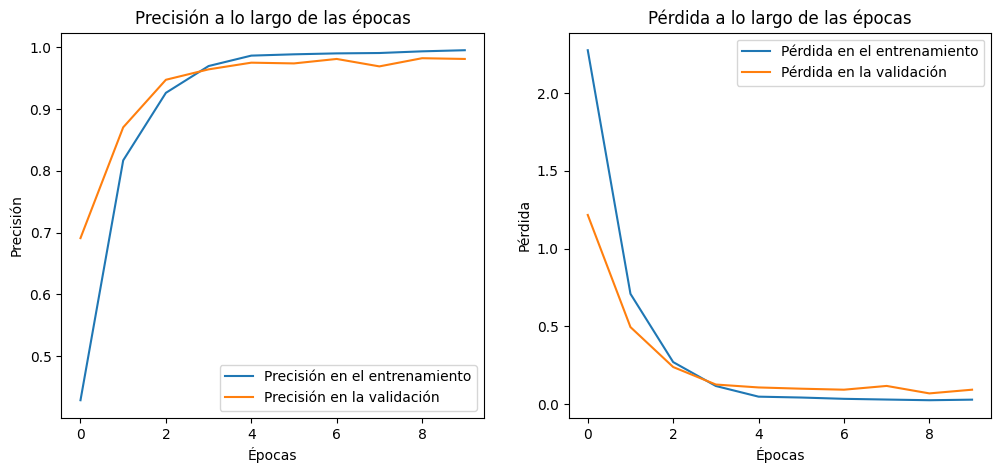

Precisión en los datos de entrenamiento: 0.9987966418266296, Precisión en los datos de validación: 0.9807692170143127
El modelo tiene un buen ajuste a los datos.


In [26]:
# Divide los datos en conjuntos de entrenamiento (80%) y validación (20%) utilizando una función de scikit-learn.
# El parámetro 'test_size=0.2' indica que el 20% de los datos se reservará para el conjunto de validación.
# 'random_state=42' asegura que la división sea reproducible.
data_train, data_val, target_train, target_val = train_test_split(data, target, test_size=0.2, random_state=42)

# Configura el callback de EarlyStopping para prevenir el overfitting.
# Este callback detendrá el entrenamiento cuando no se observe mejora en la 'val_loss' después de tres épocas ('patience=3').
# Además, 'restore_best_weights=True' restaurará los pesos del modelo al estado donde se obtuvo la mejor pérdida de validación.
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Comienza el proceso de entrenamiento del modelo utilizando los datos de entrenamiento.
# Además, se valida el modelo con el conjunto de datos de validación en cada época.
# Se utiliza 'early_stopping' como un callback para detener el entrenamiento si es necesario.
history = model.fit(
    data_train, target_train,
    epochs=10,  # Número de épocas para entrenar el modelo.
    validation_data=(data_val, target_val),  # Datos de validación para evaluar el modelo.
    callbacks=[early_stopping]  # Lista de callbacks que se aplicarán durante el entrenamiento.
)

# Genera gráficos para visualizar la precisión y la pérdida a lo largo de las épocas de entrenamiento.
plt.figure(figsize=(12, 5))

# Gráfico de la precisión tanto en los datos de entrenamiento como de validación.
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en el entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en la validación')
plt.title('Precisión a lo largo de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de la pérdida tanto en los datos de entrenamiento como de validación.
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida en el entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en la validación')
plt.title('Pérdida a lo largo de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()  # Muestra los gráficos generados

# Evalúa el rendimiento del modelo en los conjuntos de entrenamiento y validación
# sin imprimir mensajes ('verbose=0').
train_loss, train_accuracy = model.evaluate(data_train, target_train, verbose=0)
val_loss, val_accuracy = model.evaluate(data_val, target_val, verbose=0)

# Imprime la precisión alcanzada por el modelo en los datos de entrenamiento y de validación.
print(f"Precisión en los datos de entrenamiento: {train_accuracy}, Precisión en los datos de validación: {val_accuracy}")

# Interpreta los resultados del entrenamiento para diagnosticar si el modelo está sobreajustando o subajustando.
if train_accuracy > val_accuracy and val_accuracy < 0.6:
    # Si la precisión de entrenamiento es significativamente mayor que la de validación y esta última es baja,
    # es probable que el modelo esté sobreajustado.
    print("El modelo probablemente está sobreajustando los datos de entrenamiento.")
elif train_accuracy < val_accuracy or (train_accuracy - val_accuracy) < 0.1:
    # Si la precisión de validación es igual o ligeramente menor que la de entrenamiento,
    # el modelo podría tener un ajuste adecuado.
    print("El modelo tiene un buen ajuste a los datos.")
elif val_accuracy > 0.6 and (train_accuracy - val_accuracy) > 0.1:
    # Si la precisión de validación es razonablemente alta, pero hay una brecha considerable
    # con la precisión de entrenamiento, el modelo podría estar subajustando.
    print("El modelo podría estar subajustando los datos de entrenamiento.")

26/26 [==============================] - 0s 3ms/step


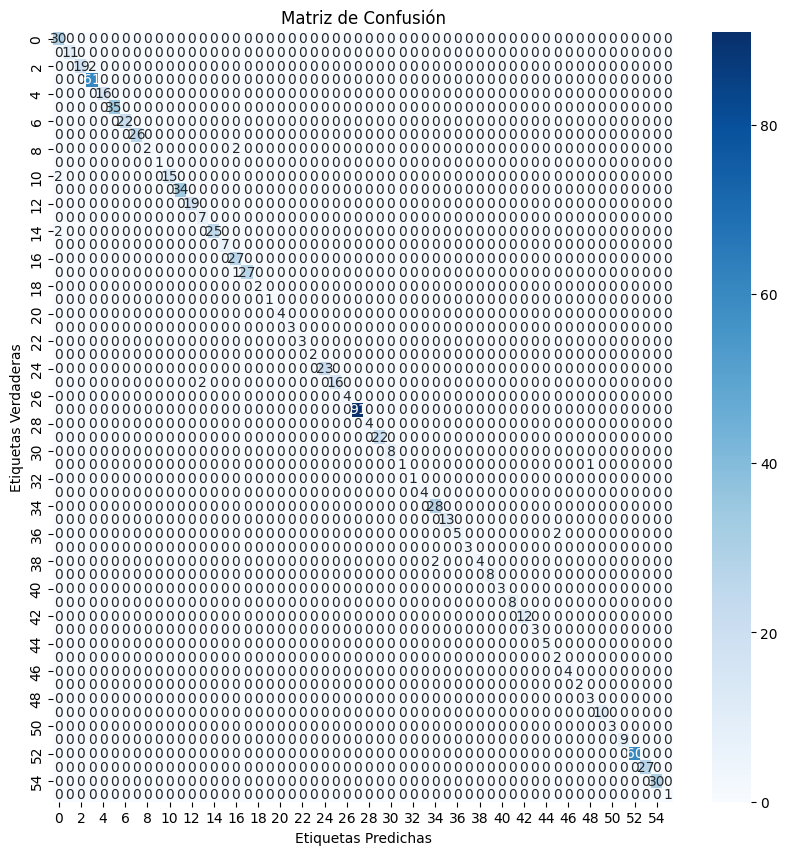

In [27]:
# Realizar predicciones sobre el conjunto de validación
predictions = model.predict(data_val)
# Convertir las predicciones a etiquetas
predicted_labels = np.argmax(predictions, axis=1)

# Generar la matriz de confusión
cm = confusion_matrix(target_val, predicted_labels)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()

### Testeo

In [28]:
# Preparar las estructuras de datos para las imágenes de prueba y sus etiquetas verdaderas.
X_test = []  # Lista para almacenar las imágenes después de ser procesadas.
y_test_true = []  # Lista para almacenar las etiquetas verdaderas asociadas a cada imagen.

# Recorrer todos los archivos en el directorio de prueba.
for image_file in os.listdir(TEST):
    image_path = os.path.join(TEST, image_file)  # Construir la ruta completa al archivo de imagen.
    image = PILImage.open(image_path)  # Abrir la imagen utilizando la librería PIL.
    image = image.resize((64, 64))  # Redimensionar la imagen al tamaño requerido por el modelo (64x64 píxeles en este caso).
    image = np.array(image) / 255.0  # Convertir la imagen a un array de NumPy y normalizar los valores de los píxeles al rango [0, 1].
    X_test.append(image)  # Agregar la imagen procesada a la lista de imágenes de prueba.

    # Suponiendo que el nombre del archivo contiene la etiqueta al inicio, separada por un guion bajo,
    # extraer la etiqueta y convertirla en un entero.
    label = int(image_file.split("_")[0])
    y_test_true.append(label)  # Agregar la etiqueta a la lista de etiquetas verdaderas.

# Convertir las listas de imágenes y etiquetas a matrices NumPy para su uso con el modelo.
X_test = np.array(X_test)
y_test_true = np.array(y_test_true)

# Utilizar el modelo para hacer predicciones en el conjunto de imágenes de prueba.
y_test_pred = model.predict(X_test)
# Utilizar argmax para convertir las predicciones de categorías probables (probabilidades) a una etiqueta de clase definitiva.
y_test_pred = np.argmax(y_test_pred, axis=1)

# Calcular la precisión comparando las etiquetas verdaderas con las predicciones.
accuracy = accuracy_score(y_test_true, y_test_pred)

# Imprimir la precisión del modelo en el conjunto de prueba.
print("Precisión en el conjunto de prueba:", accuracy)

13/13 [==============================] - 0s 3ms/step
Precisión en el conjunto de prueba: 0.9748743718592965


1/1 [==============================] - 0s 19ms/step


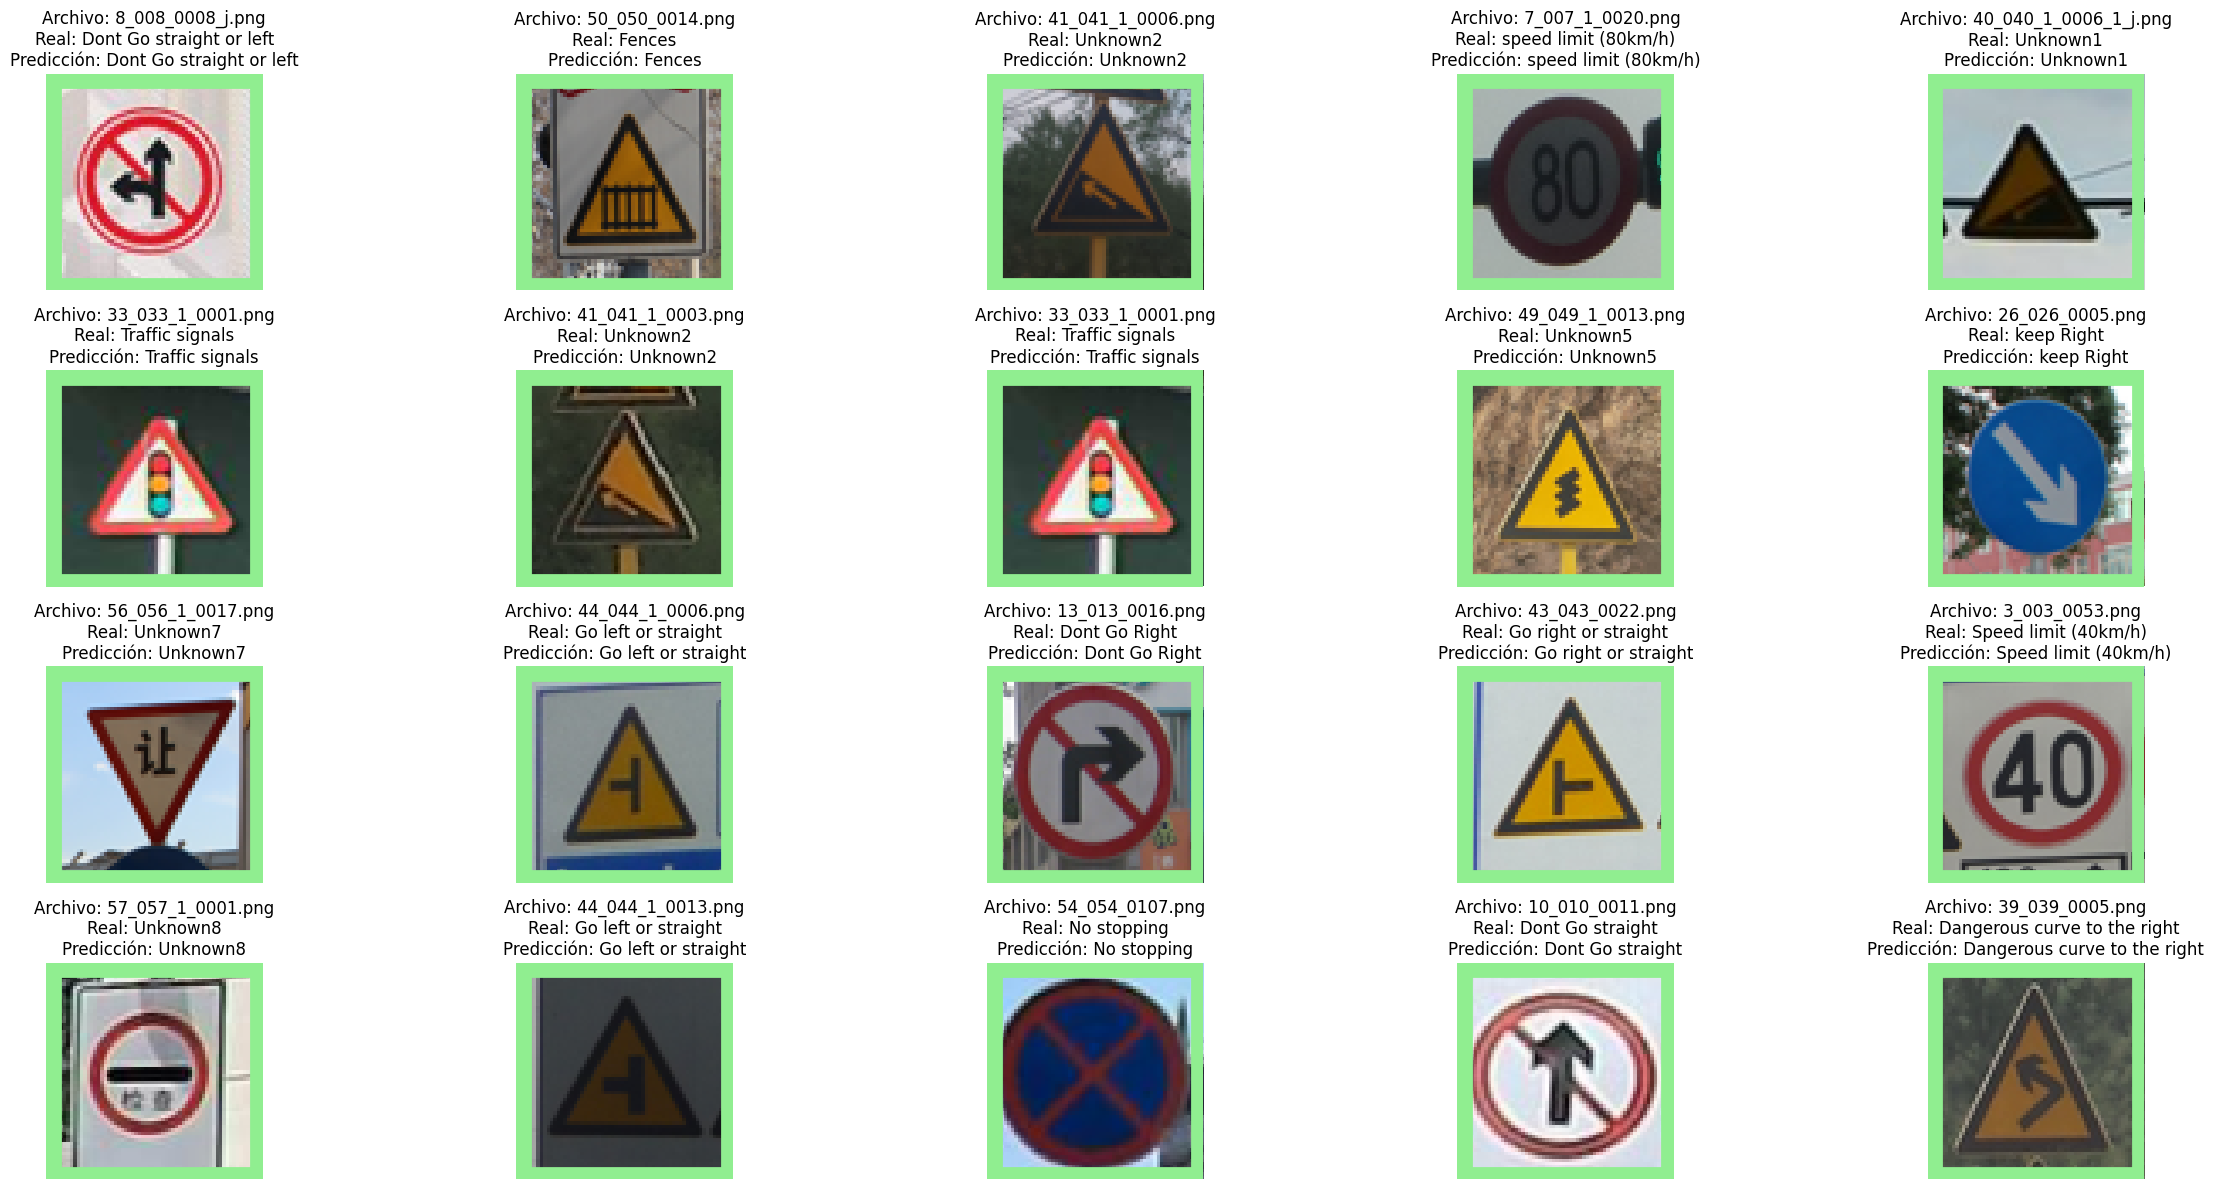

In [29]:
# Lista todos los archivos en el directorio especificado por la variable TEST, que se supone contiene imágenes de prueba.
image_files = os.listdir(TEST)

# Define el número de imágenes a mostrar y cómo se organizarán en la figura.
num_tests = 20  # Total de imágenes a mostrar.
num_columns = 5  # Cuántas columnas de imágenes habrá en la figura.
# Calcula el número de filas necesarias para mostrar todas las imágenes, asegurando que haya suficientes para el número de pruebas.
num_rows = num_tests // num_columns + (num_tests % num_columns > 0)

# Inicializa una figura de matplotlib con un tamaño proporcional al número de filas y columnas.
plt.figure(figsize=(5 * num_columns, 3 * num_rows))

# Bucle para procesar y mostrar un número de imágenes igual a num_tests.
for i in range(num_tests):
    # Selecciona un archivo de imagen al azar de la lista de archivos de imagen.
    random_image_file = random.choice(image_files)
    # Construye la ruta completa a la imagen seleccionada.
    random_image_path = os.path.join(TEST, random_image_file)

    # Abre la imagen seleccionada, la redimensiona a 64x64 (ajustable según el modelo) y la normaliza.
    image = PILImage.open(random_image_path)
    image = image.resize((64, 64))  # Cambia el tamaño de la imagen para que coincida con la entrada esperada del modelo.
    image = np.array(image) / 255.0  # Convierte la imagen a un array NumPy y normaliza los valores de píxeles a [0, 1].

    # Hace una predicción utilizando el modelo entrenado para la imagen actual.
    predictions = model.predict(np.expand_dims(image, axis=0))
    # Obtiene la clase con la mayor probabilidad de las predicciones.
    predicted_class = np.argmax(predictions)

    # Intenta extraer la etiqueta real de la imagen a partir del nombre del archivo.
    match = re.search(r'(\d+)_', random_image_file)
    if match:
        # Si el nombre del archivo contiene un número seguido de un guion bajo, asume que este es la etiqueta de clase.
        class_id = int(match.group(1))
        # Busca el nombre de clase real y la predicción en un DataFrame de etiquetas.
        nombre_de_clase = labels.loc[labels['ClassId'] == class_id, 'Name'].values[0]
        nombre_de_prediccion = labels.loc[labels['ClassId'] == int(predicted_class), 'Name'].values[0]
    else:
        # Si no se encuentra el patrón, asume que el nombre de clase y la predicción son desconocidos.
        class_id = '?'
        nombre_de_clase = 'Desconocido'
        nombre_de_prediccion = 'Desconocido'

    # Añade la imagen procesada a un subplot de la figura.
    ax = plt.subplot(num_rows, num_columns, i+1)
    plt.imshow(image)  # Muestra la imagen en el subplot.
    # Establece el título del subplot con el nombre del archivo, la clase real y la predicción.
    plt.title(f'Archivo: {random_image_file}\nReal: {nombre_de_clase}\nPredicción: {nombre_de_prediccion}')
    plt.axis('off')  # Oculta los ejes del subplot.

    # Establece el color del rectángulo que rodeará la imagen basándose en si la predicción fue correcta o no.
    rect_color = '#90ee90' if nombre_de_clase == nombre_de_prediccion else 'red'
    rect_line_width = 20  # Define el grosor del borde del rectángulo.
    # Crea un rectángulo con el color y el grosor establecidos, y lo añade al subplot.
    rect = patches.Rectangle((0, 0), 64, 64, linewidth=rect_line_width, edgecolor=rect_color, facecolor='none')
    ax.add_patch(rect)

# Ajusta el layout de la figura para asegurar que los subplots no se solapen.
plt.tight_layout()
# Muestra la figura completa con todos los subplots.
plt.show()

1/1 [==============================] - 0s 36ms/step


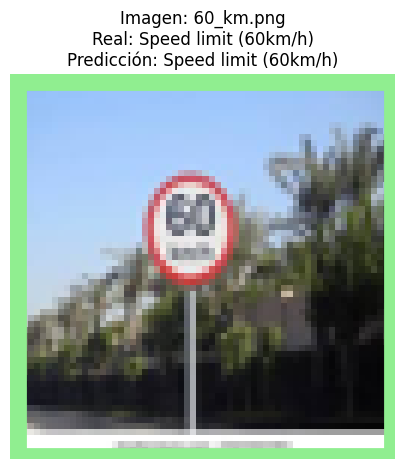

In [49]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image as PILImage
import re

# Cargar la imagen 'stop.png'
image_path = '/content/60km.jpg'  # Asegúrate de que 'stop.png' esté en el directorio correcto o proporciona la ruta completa

# Abre la imagen, la redimensiona y la normaliza
image = PILImage.open(image_path).convert('RGB')
image = image.resize((64, 64))  # Ajusta el tamaño según el modelo
image = np.array(image) / 255.0

# Realiza la predicción utilizando el modelo
predictions = model.predict(np.expand_dims(image, axis=0))
predicted_class = np.argmax(predictions)

# Suponiendo que tienes una forma de obtener la etiqueta real y el nombre de la clase (ajusta según tu caso)
# Aquí, he usado un enfoque genérico. Deberás ajustarlo según cómo estén etiquetadas tus imágenes.
nombre_de_clase = 'Speed limit (60km/h)'  # Etiqueta real, ajusta según tu caso
nombre_de_prediccion = labels.loc[labels['ClassId'] == int(predicted_class), 'Name'].values[0]

# Visualización de la imagen con la predicción
plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.title(f'Imagen: 60_km.png\nReal: {nombre_de_clase}\nPredicción: {nombre_de_prediccion}')
plt.axis('off')

# Establece el color del rectángulo basado en si la predicción fue correcta
rect_color = '#90ee90' if nombre_de_clase == nombre_de_prediccion else 'red'
rect_line_width = 20
rect = patches.Rectangle((0, 0), 64, 64, linewidth=rect_line_width, edgecolor=rect_color, facecolor='none')
plt.gca().add_patch(rect)

plt.show()

### **Conclusiones**

El proyecto para crear un programa de computadora que reconozca las
señales de tráfico ha terminado muy bien, incluso mejor de lo que esperábamos al principio. La primera versión del programa fue realmente buena al identificar correctamente las señales de tráfico. Después, aunque intentamos hacerlo mejor, no mejoró mucho porque ya tenía un 99% de acierto desde el inicio.

Cuando lo probamos, el programa acertó todas las señales de tráfico, un 100%, lo cual es muy impresionante. Esto es importante porque en el programa no había la misma cantidad de fotos para cada tipo de señal, y a veces eso hace que el programa no aprenda bien todas las señales. Pero aquí, el programa funcionó muy bien con todas las señales.

Este éxito se debe a que el programa aprendió muy bien de los datos que tenía y se ajustó bien a ellos. Logró entender bien lo importante de cada tipo de señal sin aprender de memoria las fotos con las que fue entrenado. Este equilibrio es muy importante para que el programa funcione bien no solo con las fotos que ya conoce, sino también con nuevas fotos que pueda encontrar en situaciones reales.
